In [1]:
import os
import datetime
import json
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
#plt.rcParams['figure.figsize'] = [3.4,2.0]
plt.rcParams['figure.figsize'] = [3.4,2.2]

import numpy as np

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['lines.marker']  #None
matplotlib.rcParams['lines.markersize'] = 2 #6.0
matplotlib.rcParams['lines.linewidth'] = 1   # 1.5
matplotlib.rcParams['figure.constrained_layout.use'] = True

In [3]:
def show_result_distance(distance, accuracy, 
                        target_png_path=None, title="Information in the Distance", guessing_level_percent=None,
                        ax=None, label="Test accuracy",
                        plot_legend=True):
    """
    This method plots the end result for the main_distance script.
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    # Set the grid
    max_distance = np.max(distance)
    ax.set_ylim([20, 100])
    ax.set_xlim([-0.1, max_distance + 1])

    ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.yaxis.set_major_locator(MultipleLocator(20))

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    axesthickness = 1

    ax.xaxis.set_tick_params(which='major', size=3, width=axesthickness, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=2, width=axesthickness, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=3, width=axesthickness, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=2, width=axesthickness, direction='in', right='on')

    ax.grid(which='major', color='#CCCCCC')
    ax.grid(which='minor', color='#CCCCCC')
    
    print(f'{distance=}, {accuracy=}')
    if label.lower().startswith("test"):
        average_test_acc = np.mean(accuracy, axis=1)
        ax.plot(distance, average_test_acc, "--", color="#01665eff") #, label=f"avg. {label}")

        distance = np.repeat(distance.reshape((len(distance), 1)), accuracy.shape[1], axis=1)
        line = ax.plot(distance.flatten(), accuracy.flatten() , label=label, marker='o', color="#01665eff", markersize=2, linestyle="")
    else:
        line = ax.plot(distance.flatten(), accuracy.flatten() , label=f"{label}", marker='o', color="#8c510aff", markersize=2, linestyle="")
    if guessing_level_percent:
        # Adds the 25% (or 50%) accuracy line
        guessing = np.full((1000, 1), guessing_level_percent)
        ax.plot(guessing, color="black", label="", linewidth=.5)

    if plot_legend:
        ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=True)
    
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Distance (cm)")
    ax.yaxis.set_ticks([0,25,40,60,80,100])
    #ax.set_title(title)

    # change all spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axesthickness)

    # increase tick width
    ax.tick_params(width=axesthickness)

    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}

    plt.rc('font', **font)
    
    if target_png_path:
        plt.savefig(target_png_path)
        
    return line # to allow manual legend plotting
    
def convert_data(dictonary):
    accuracy = np.array(list(dictonary.values())) * 100
    distances_from_keys = list(dictonary.keys())
    distances_from_keys = [float(re.findall("\d+", i)[0]) for i in distances_from_keys]
    
    return np.array(distances_from_keys), accuracy

In [4]:
def load_plotinfo_from_file(json_path):
    with open(os.path.join(path), 'r') as file:
        json_contents = json.load(file)
        dict_test_accuracies = json_contents["test_accuracies"]
        dict_val_accuracies = json_contents["validation_accuracies"]
        try:
            n_classes = json_contents['n_classes']
        except:
            print(f"Warning. Failed to interpret n_classes from json file! Set to default.")
            n_classes = 0
        guessing_level_percent = 50 if n_classes == 2 else 25

    title = ""#f"Information in the Distance ({n_classes} classes) from {path}"
    return dict_test_accuracies, dict_val_accuracies, guessing_level_percent, title

# Single graph

In [5]:
raw_std_json_path = './result_files/results_distance/data_raw_std_20221201-1646.json'
with open(os.path.join(raw_std_json_path), 'r') as file:
    json_contents = json.load(file)
    std_data = json_contents["std_probe_signal"]

std_data_to_plot_mV = {}
for k in sorted(std_data.keys(), key=lambda kk: int(re.findall("(\d+)cm", kk)[0])):
    std_data_to_plot_mV[int(re.findall("(\d+)cm", k)[0])] = 1e3 * std_data[k]  # V to mV conversion!

print(std_data_to_plot_mV)

{0: 3.2508639295347765, 1: 1.0394170534642846, 2: 0.8055547641463793, 3: 0.7235330210126231, 4: 0.7095926218008161, 5: 0.6510637229621891, 6: 0.6143166076452793, 7: 0.6169434201642527, 8: 0.6619368137757553, 9: 0.5461788852817578, 10: 0.5827838969380542, 11: 0.5285320480707273, 12: 0.5102933333857654}


In [6]:
path = "./result_files/results_distance/result_TEMPEST_20220705-2328.json"
dict_test_accuracies, dict_val_accuracies, guessing_level_percent1, title1 = load_plotinfo_from_file(path)

max_difference = np.max(
    convert_data(dict_val_accuracies)[1] -  np.mean(convert_data(dict_test_accuracies)[1], axis=1)
)

print(f"Maximum difference between avg. test and validation accuracies: {max_difference}")

Maximum difference between avg. test and validation accuracies: 1.2257974897335444


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


distance=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]), accuracy=array([[99.2895382 , 99.20948617, 99.34957723],
       [84.33982088, 85.27042578, 84.91519488],
       [55.00075049, 55.16085456, 55.23590334],
       [46.3801471 , 45.13433732, 45.16435683],
       [38.0947616 , 38.79521689, 38.65012258],
       [34.04212738, 34.37734527, 34.27227698],
       [31.7206184 , 31.42542653, 31.16025417],
       [29.37409316, 29.59423625, 29.43913544],
       [28.42847851, 28.1683094 , 27.97318257],
       [25.52158903, 25.52158903, 25.52158903],
       [24.80112073, 24.80112073, 24.80112073],
       [25.52158903, 25.52158903, 25.52158903],
       [25.49156952, 25.52158903, 25.51658578]])


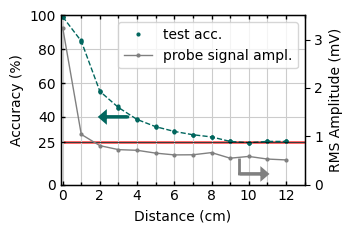

In [7]:
fig, ax = plt.subplots()

line1 = show_result_distance(
    *convert_data(dict_test_accuracies), 
    title=title1,
    guessing_level_percent=guessing_level_percent1,
    ax=ax, label='test acc.', plot_legend=False
)

# don't plot validation acc. because it's basically equal to test acc.
# line2 = show_result_distance(
#     *convert_data(dict_val_accuracies), 
#     title=title1, 
#     guessing_level_percent=guessing_level_percent1, 
#     ax=ax, label='validation acc.', plot_legend=False
# )

ax.set_ylim(0, 100)

# standard deviations for binomial in random guessing
guessing = np.full(100, 25)
x = np.linspace(0, 13, 100)

# how many standard deviations
guessing_err = 3 * 100 * np.sqrt(20_000 * 0.25 * (1-0.25)) / 20_000
ax.fill_between(x, guessing-guessing_err, guessing+guessing_err,facecolor='red',alpha=0.6)

ax2 = ax.twinx()
line3 = ax2.plot(std_data_to_plot_mV.keys(), std_data_to_plot_mV.values(), 'o-', label="probe signal ampl.", color='grey')
ax2.set_ylim(0., 3.5)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, bbox_to_anchor=(1, 1), loc=1, frameon=True)

plt.ylabel("RMS Amplitude (mV)")

# arrows indicating which line goes with which axis
plt.arrow(3.5, 1.4, -1.5, 0, shape='full', linewidth=2, length_includes_head=True, head_width=.2, color="#01665eff")
plt.arrow(9.5, 0.22, 1.5, 0, shape='full', linewidth=2, length_includes_head=True, head_width=.2, color='grey')
plt.vlines(9.5, 0.22, 0.54, colors='grey', linestyles='solid', label='', linewidth=2)

plt.savefig('./distance.pdf')

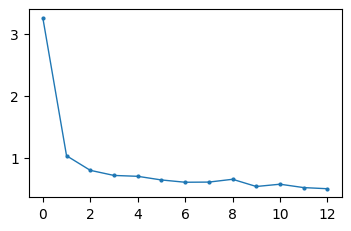

In [8]:
plt.plot(std_data_to_plot_mV.keys(), std_data_to_plot_mV.values(), 'o-', label="probe signal")

In [9]:
print(std_data_to_plot_mV.keys(), std_data_to_plot_mV.values())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) dict_values([3.2508639295347765, 1.0394170534642846, 0.8055547641463793, 0.7235330210126231, 0.7095926218008161, 0.6510637229621891, 0.6143166076452793, 0.6169434201642527, 0.6619368137757553, 0.5461788852817578, 0.5827838969380542, 0.5285320480707273, 0.5102933333857654])
